In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

Step 1: Loading the Data

In [117]:

data = pd.read_csv(r"C:\Users\jaswa\OneDrive\Desktop\CyberThreat-project\Dataset\new_dataset.csv")

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
print(data['Label'].value_counts())  


Benign                      600800
Infilteration               150000
DoS attacks-Hulk            130000
DoS attacks-SlowHTTPTest    130000
FTP-BruteForce              100000
SSH-Bruteforce              100000
DDoS attacks-LOIC-HTTP      100000
Bot                         100000
DoS attacks-GoldenEye        10000
DoS attacks-Slowloris        10000
DDOS attack-HOIC             10000
DDOS attack-LOIC-UDP         10000
Brute Force -Web               800
Brute Force -XSS               800
SQL Injection                  800
Name: Label, dtype: int64


In [118]:
data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3389,6,2018-02-14 09:18:54,1216908,8,7,1138.0,1581.0,677.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,53,17,2018-02-14 02:05:46,1067,1,1,45.0,61.0,45.0,45.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,53,17,2018-02-14 11:34:03,469,1,1,37.0,53.0,37.0,37.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,53,17,2018-02-14 02:30:33,329,1,1,47.0,175.0,47.0,47.0,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,3389,6,2018-02-14 03:31:07,2362201,10,7,1138.0,1581.0,677.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [119]:
data.shape

(1453200, 80)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453200 entries, 0 to 1453199
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Dst Port           1453200 non-null  int64         
 1   Protocol           1453200 non-null  int64         
 2   Timestamp          1453200 non-null  datetime64[ns]
 3   Flow Duration      1453200 non-null  int64         
 4   Tot Fwd Pkts       1453200 non-null  int64         
 5   Tot Bwd Pkts       1453200 non-null  int64         
 6   TotLen Fwd Pkts    1453200 non-null  float64       
 7   TotLen Bwd Pkts    1453200 non-null  float64       
 8   Fwd Pkt Len Max    1453200 non-null  float64       
 9   Fwd Pkt Len Min    1453200 non-null  float64       
 10  Fwd Pkt Len Mean   1453200 non-null  float64       
 11  Fwd Pkt Len Std    1453200 non-null  float64       
 12  Bwd Pkt Len Max    1453200 non-null  float64       
 13  Bwd Pkt Len Min    1453200 

In [121]:
data.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,...,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06,1.453200e+06
mean,8.581406e+03,7.498496e+00,7.248372e+06,8.155782e+02,4.780544e+00,2.640953e+04,2.574603e+03,2.048736e+02,6.208216e+00,4.748531e+01,...,8.126325e+02,2.464960e+01,1.075204e+05,4.633688e+04,1.568087e+05,7.695799e+04,2.781716e+06,4.766717e+05,3.804097e+06,2.195719e+06
std,1.781288e+04,3.875777e+00,4.953927e+08,1.001813e+04,1.103410e+02,3.218305e+05,1.585789e+05,3.491798e+02,2.113066e+01,7.253056e+01,...,1.001822e+04,1.023172e+01,1.718512e+06,9.873034e+05,2.259272e+06,1.466515e+06,3.950494e+08,2.821765e+08,1.131242e+09,1.324452e+07
min,0.000000e+00,0.000000e+00,-5.298010e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,6.000000e+00,8.400000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,1.112400e+04,2.000000e+00,1.000000e+00,2.000000e+01,5.700000e+01,2.000000e+01,0.000000e+00,6.666667e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.389000e+03,6.000000e+00,1.605250e+06,5.000000e+00,4.000000e+00,4.370000e+02,3.960000e+02,3.260000e+02,0.000000e+00,8.033333e+01,...,1.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,3.096290e+05,6.757200e+04,1.348670e+07,9.860000e+07,6.444000e+04,1.460000e+03,1.652931e+04,...,3.096280e+05,5.600000e+01,1.140000e+08,6.845835e+07,1.140000e+08,1.140000e+08,3.394503e+11,2.432682e+11,9.797810e+11,7.758000e+09


In [122]:
data.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

Step 2: Data Preprocessing

2.1 Correlation Matrix Analysis and Feature Reduction Based on High Correlation

In [123]:
corr_matrix = data.corr()

C:\Users\jaswa\AppData\Local\Temp\ipykernel_12680\962194556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


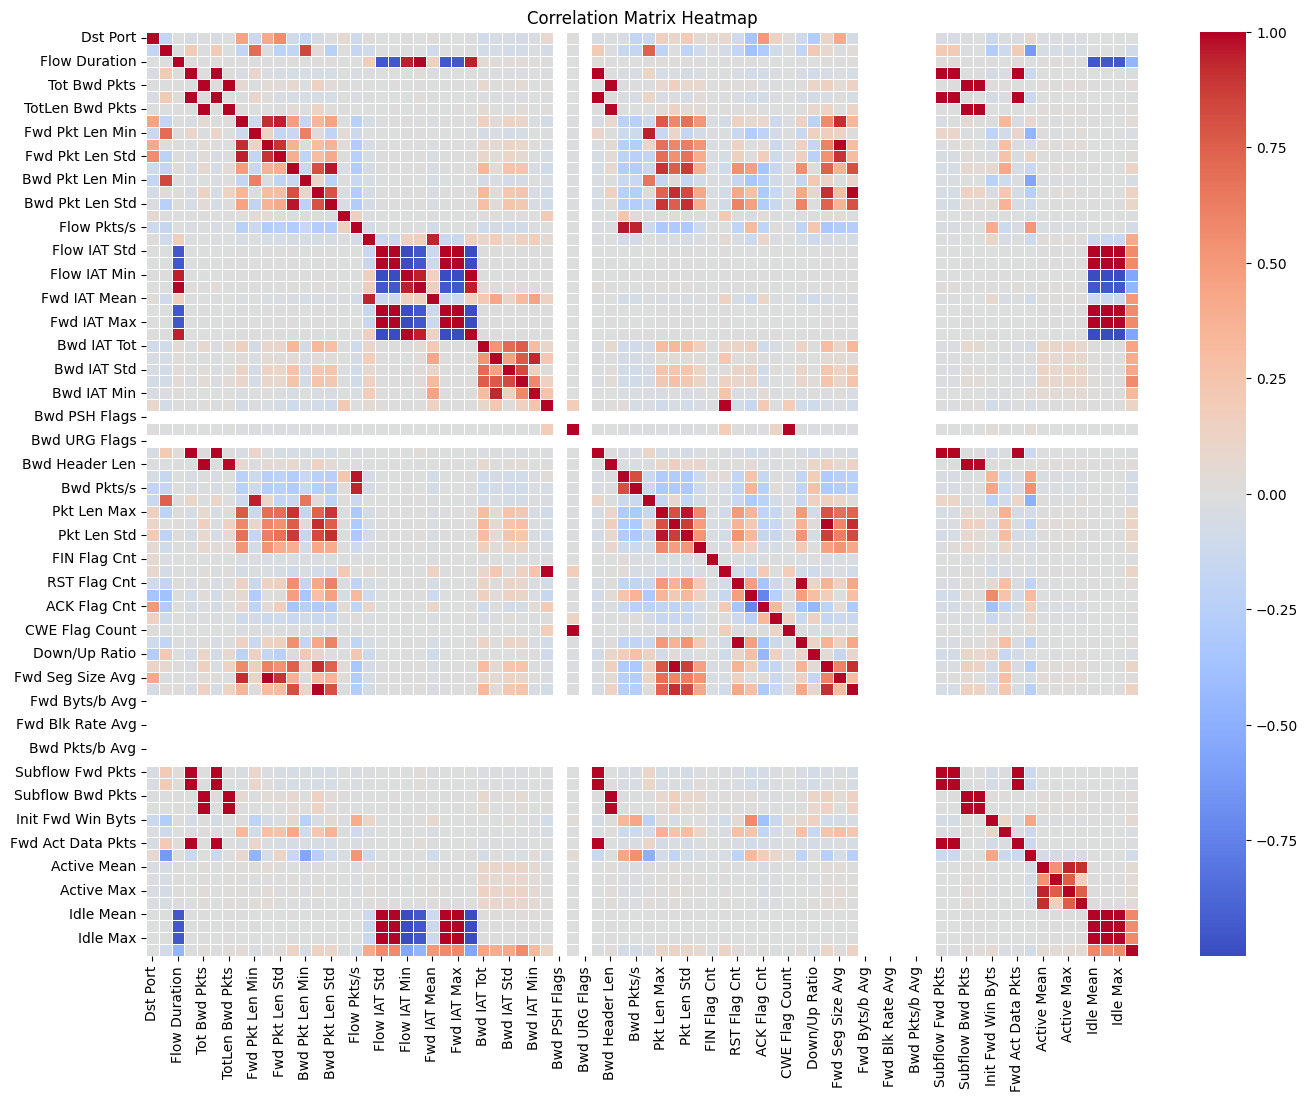

In [124]:
plt.figure(figsize=(16, 12))  
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [125]:
threshold = 0.9

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = (
    upper_tri.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
)

high_corr_pairs = high_corr_pairs[abs(high_corr_pairs["Correlation"]) > threshold]

high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print("Highly Correlated Features:")
print(len(high_corr_pairs))




Highly Correlated Features:
106


In [126]:

corr_threshold = 0.90

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_threshold)]

print("Highly correlated features to drop:", to_drop)

data_reduced = data.drop(columns=to_drop)


data = data_reduced

Highly correlated features to drop: ['TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'SYN Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Fwd Act Data Pkts', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max']


2.2 Feature Engineering

In [127]:
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

data.drop('Timestamp', axis=1, inplace=True)


In [128]:
data.shape

(1453200, 46)

2.3 Label Encoding 

In [129]:

X=data.drop("Label",axis=1,inplace=False)
y=data["Label"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["Label"])


In [130]:
y

array([0, 0, 0, ..., 1, 1, 1])

2.4 Handle Missing Values and Outliers


In [131]:
missing_values = X.isnull().sum()
print(missing_values[missing_values > 0])

import numpy as np
X.fillna(X.median(), inplace=True)

X = X.replace([np.inf, -np.inf], 0)

Flow Byts/s    2916
dtype: int64


2.5 Feature Scaling


In [132]:

numeric_columns = X.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)


In [133]:
scaled_data.shape

(1453200, 45)

2.6 Prepare Features and Target and performing Label Encoding 

In [134]:

X = scaled_data.reshape(scaled_data.shape[0], 1, scaled_data.shape[1])
y = to_categorical(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)


In [135]:
X_train.shape

(1162560, 1, 45)

In [136]:
y_train.shape

(1162560, 15)

Step 3: Building the Model

In [137]:

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
lstm_model.add(LSTM(32, return_sequences=False))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lstm_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             28160     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 15)                495       
                                                                 
Total params: 42,127
Trainable params: 42,127
Non-trainable params: 0
_________________________________________________________________


Step 4: Training the Model

In [138]:
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
29064/29064 [==============================] - 115s 4ms/step - loss: 0.1459 - accuracy: 0.9262 - val_loss: 0.0891 - val_accuracy: 0.9590
Epoch 2/10
29064/29064 [==============================] - 115s 4ms/step - loss: 0.0911 - accuracy: 0.9571 - val_loss: 0.0829 - val_accuracy: 0.9609
Epoch 3/10
29064/29064 [==============================] - 105s 4ms/step - loss: 0.0853 - accuracy: 0.9598 - val_loss: 0.0816 - val_accuracy: 0.9610
Epoch 4/10
29064/29064 [==============================] - 110s 4ms/step - loss: 0.0831 - accuracy: 0.9606 - val_loss: 0.0799 - val_accuracy: 0.9622
Epoch 5/10
29064/29064 [==============================] - 113s 4ms/step - loss: 0.0820 - accuracy: 0.9613 - val_loss: 0.0801 - val_accuracy: 0.9625
Epoch 6/10
29064/29064 [==============================] - 114s 4ms/step - loss: 0.0815 - accuracy: 0.9614 - val_loss: 0.0796 - val_accuracy: 0.9620
Epoch 7/10
29064/29064 [==============================] - 120s 4ms/step - loss: 0.0810 - accuracy: 0.9618 - val_

Step 5: Testing the Model

In [139]:
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


9083/9083 [==============================] - 17s 2ms/step - loss: 0.0778 - accuracy: 0.9635
Test Loss: 0.07777703553438187, Test Accuracy: 0.9635046720504761


Step 6: Evaluating the Model

6.1 Predictions

In [140]:
y_pred = (lstm_model.predict(X_test) > 0.5).astype(int)

9083/9083 [==============================] - 14s 1ms/step


6.2 Classification Report and Confusion Matrix

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.95    119744
           1       1.00      1.00      1.00     20022
           2       0.99      0.99      0.99       156
           3       1.00      0.89      0.94       162
           4       1.00      1.00      1.00      2017
           5       1.00      1.00      1.00      1999
           6       1.00      1.00      1.00     20029
           7       1.00      1.00      1.00      1907
           8       1.00      1.00      1.00     26095
           9       1.00      1.00      1.00     26389
          10       1.00      1.00      1.00      2013
          11       1.00      1.00      1.00     20120
          12       0.78      0.91      0.84     30073
          13       0.94      1.00      0.97       166
          14       1.00      1.00      1.00     19748

   micro avg       0.96      0.96      0.96    290640
   macro avg       0.98      0.98      0.98    290640
weighted avg       0.97   

c:\Users\jaswa\conda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6.3 AUC-ROC Curve

AUC-ROC Score: 0.9892098905282474


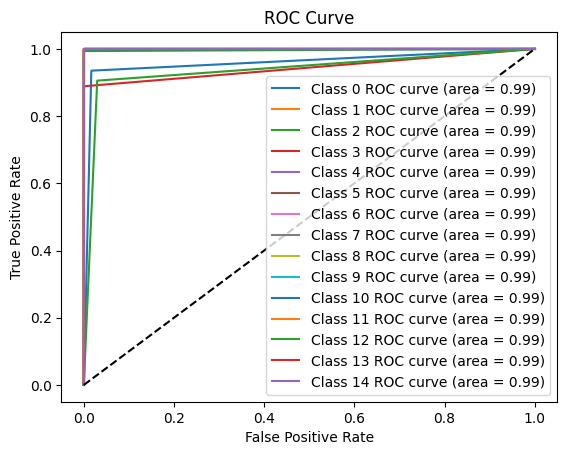

In [142]:

roc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC-ROC Score: {roc_score}")

fpr = {}
tpr = {}
thresholds = {}
for i in range(y_test.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i])

plt.figure()
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} ROC curve (area = {roc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


6.4 Loss and Accuracy Curves

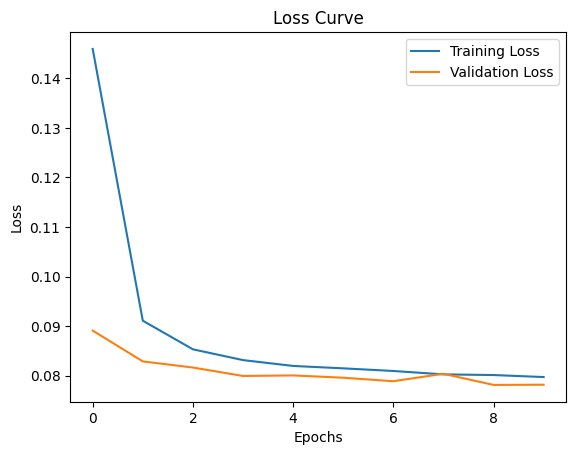

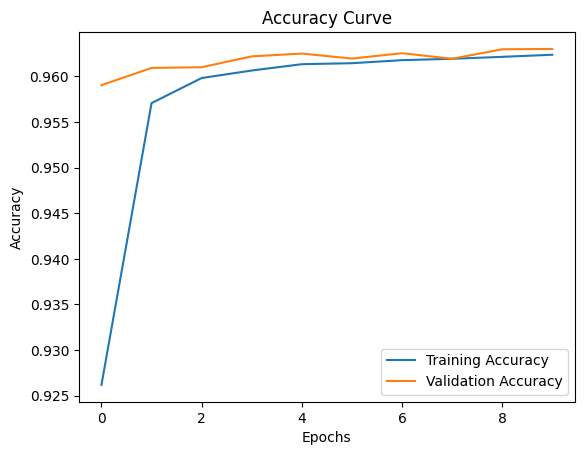

In [143]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


CNN Model

In [144]:


cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2, padding='same'))
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(pool_size=2, padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(y_train.shape[1], activation='softmax'))  # Output Layer

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 1, 64)             8704      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 32)             6176      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [145]:
cnn_model_history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32
)


Epoch 1/5
36330/36330 [==============================] - 61s 2ms/step - loss: 0.1358 - accuracy: 0.9283 - val_loss: 0.0882 - val_accuracy: 0.9589
Epoch 2/5
36330/36330 [==============================] - 56s 2ms/step - loss: 0.0893 - accuracy: 0.9579 - val_loss: 0.0845 - val_accuracy: 0.9612
Epoch 3/5
36330/36330 [==============================] - 57s 2ms/step - loss: 0.0858 - accuracy: 0.9595 - val_loss: 0.0846 - val_accuracy: 0.9621
Epoch 4/5
36330/36330 [==============================] - 57s 2ms/step - loss: 0.0848 - accuracy: 0.9601 - val_loss: 0.0878 - val_accuracy: 0.9620
Epoch 5/5
36330/36330 [==============================] - 57s 2ms/step - loss: 0.0843 - accuracy: 0.9604 - val_loss: 0.0812 - val_accuracy: 0.9619


In [146]:
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


9083/9083 [==============================] - 9s 965us/step - loss: 0.0812 - accuracy: 0.9619
Test Accuracy: 96.19%


In [147]:


y_pred = cnn_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))


9083/9083 [==============================] - 7s 789us/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.95    119744
           1       1.00      1.00      1.00     20022
           2       0.91      0.93      0.92       156
           3       0.91      0.96      0.94       162
           4       1.00      1.00      1.00      2017
           5       1.00      1.00      1.00      1999
           6       1.00      1.00      1.00     20029
           7       1.00      1.00      1.00      1907
           8       1.00      1.00      1.00     26095
           9       1.00      1.00      1.00     26389
          10       1.00      1.00      1.00      2013
          11       1.00      1.00      1.00     20120
          12       0.77      0.91      0.83     30073
          13       0.92      0.96      0.94       166
          14       1.00      1.00      1.00     19748

    accuracy                           0.96    290640
   macro avg       0.

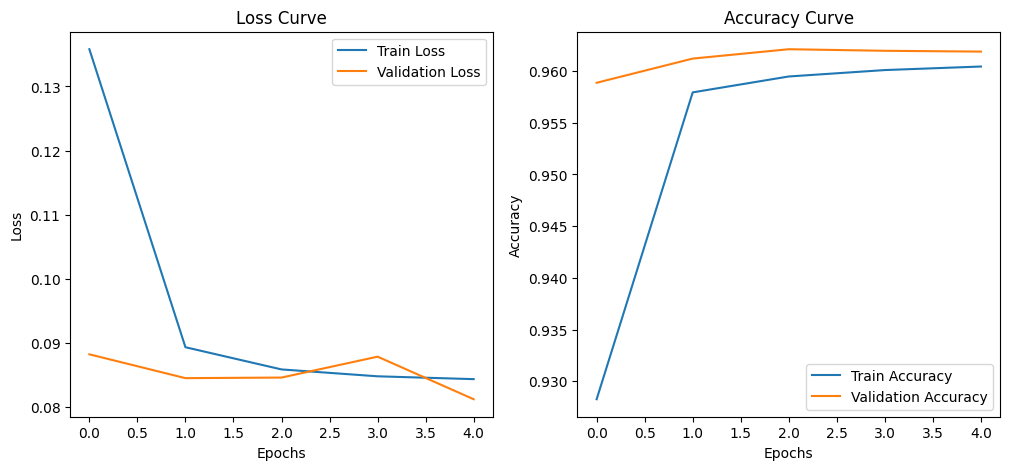

In [148]:

def plot_loss_accuracy(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    ax[0].plot(cnn_model_history.history['loss'], label='Train Loss')
    ax[0].plot(cnn_model_history.history['val_loss'], label='Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss Curve')
    ax[0].legend()

    ax[1].plot(cnn_model_history.history['accuracy'], label='Train Accuracy')
    ax[1].plot(cnn_model_history.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Accuracy Curve')
    ax[1].legend()

    plt.show()

plot_loss_accuracy(history)


AUC-ROC Score: 0.998801053596866


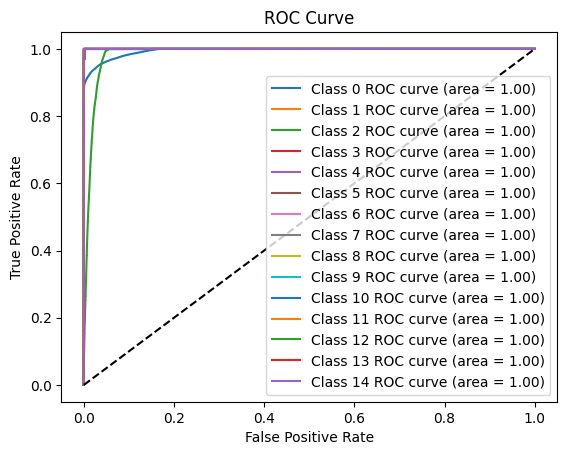

In [149]:

roc_score = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f"AUC-ROC Score: {roc_score}")

fpr = {}
tpr = {}
thresholds = {}

for i in range(y_test.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_pred[:, i])

plt.figure()
for i in range(y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} ROC curve (area = {roc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Ensemble Model

In [150]:
cnn_preds = cnn_model.predict(X_test)
lstm_preds = lstm_model.predict(X_test)

stacked_preds = np.hstack((cnn_preds, lstm_preds))


9083/9083 [==============================] - 12s 1ms/step


In [151]:

ensemble_model = Sequential()
ensemble_model.add(Dense(128, input_dim=stacked_preds.shape[1], activation='relu'))
ensemble_model.add(Dropout(0.3))
ensemble_model.add(Dense(64, activation='relu'))
ensemble_model.add(Dropout(0.3))
ensemble_model.add(Dense(y_train.shape[1], activation='softmax'))  

ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ensemble_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               3968      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 15)                975       
                                                                 
Total params: 13,199
Trainable params: 13,199
Non-trainable params: 0
_________________________________________________________________


In [152]:
ensemble_model_history = ensemble_model.fit(stacked_preds, y_test, epochs=5, batch_size=32, validation_data=(stacked_preds, y_test))


Epoch 1/5
9083/9083 [==============================] - 22s 2ms/step - loss: 0.0998 - accuracy: 0.9598 - val_loss: 0.0790 - val_accuracy: 0.9634
Epoch 2/5
9083/9083 [==============================] - 20s 2ms/step - loss: 0.0797 - accuracy: 0.9629 - val_loss: 0.0787 - val_accuracy: 0.9630
Epoch 3/5
9083/9083 [==============================] - 21s 2ms/step - loss: 0.0792 - accuracy: 0.9631 - val_loss: 0.0778 - val_accuracy: 0.9634
Epoch 4/5
9083/9083 [==============================] - 21s 2ms/step - loss: 0.0790 - accuracy: 0.9632 - val_loss: 0.0781 - val_accuracy: 0.9635
Epoch 5/5
9083/9083 [==============================] - 20s 2ms/step - loss: 0.0788 - accuracy: 0.9632 - val_loss: 0.0778 - val_accuracy: 0.9630


In [153]:
ensemble_preds = ensemble_model.predict(stacked_preds)
ensemble_accuracy = np.argmax(ensemble_preds, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


9083/9083 [==============================] - 7s 762us/step


In [154]:
loss, accuracy = ensemble_model.evaluate(stacked_preds, y_test)
print(f"Ensemble model Loss: {loss:.4f}, Ensemble Accuracy: {accuracy:.4f}")

9083/9083 [==============================] - 9s 962us/step - loss: 0.0778 - accuracy: 0.9630
Ensemble model Loss: 0.0778, Ensemble Accuracy: 0.9630


In [155]:

print("\nClassification Report:")
print(classification_report(y_true_classes, ensemble_accuracy))



Classification Report:


              precision    recall  f1-score   support

           0       0.97      0.94      0.95    119744
           1       1.00      1.00      1.00     20022
           2       0.99      0.99      0.99       156
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00      2017
           5       1.00      1.00      1.00      1999
           6       1.00      1.00      1.00     20029
           7       1.00      1.00      1.00      1907
           8       1.00      1.00      1.00     26095
           9       1.00      1.00      1.00     26389
          10       1.00      1.00      1.00      2013
          11       1.00      1.00      1.00     20120
          12       0.79      0.88      0.83     30073
          13       1.00      1.00      1.00       166
          14       1.00      1.00      1.00     19748

    accuracy                           0.96    290640
   macro avg       0.98      0.99      0.99    290640
weighted avg       0.97   